In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries and Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as w
w.filterwarnings('ignore')
%matplotlib inline


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

## Reading the Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College Assignments/ML Assign/Data Sets/MLK/Tel-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Structure and Summary

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After printing the statistics of data we got to know that the data distribution is appropriate.

## Checking the null values

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So there are no null values in the dataset

## Checking the structure of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Check the data types are appropriate and converting them into categories or encoding them wherever required

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [ ]:
for i in cols:
    print(i," ",df[i].unique())

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No phone service' 'No' 'Yes']
InternetService   ['DSL' 'Fiber optic' 'No']
OnlineSecurity   ['No' 'Yes' 'No internet service']
OnlineBackup   ['Yes' 'No' 'No internet service']
DeviceProtection   ['No' 'Yes' 'No internet service']
TechSupport   ['No' 'Yes' 'No internet service']
StreamingTV   ['No' 'Yes' 'No internet service']
StreamingMovies   ['No' 'Yes' 'No internet service']
Contract   ['Month-to-month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2

In [ ]:
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']:
    df[i].replace('No internet service','No',inplace=True)

In [ ]:
df['MultipleLines'].replace('No phone service','No',inplace=True)
df.Contract.replace('Month-to-month','Month',inplace=True)
df['InternetService'].replace(['DSL','Fiber optic'],'Yes',inplace=True)
df.TotalCharges.replace(" ","0.0",inplace=True)
df.TotalCharges = df.TotalCharges.astype(float)

In [ ]:
for i in cols:
    print(i," ",df[i].unique())

gender   ['Female' 'Male']
SeniorCitizen   [0 1]
Partner   ['Yes' 'No']
Dependents   ['No' 'Yes']
tenure   [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService   ['No' 'Yes']
MultipleLines   ['No' 'Yes']
InternetService   ['Yes' 'No']
OnlineSecurity   ['No' 'Yes']
OnlineBackup   ['Yes' 'No']
DeviceProtection   ['No' 'Yes']
TechSupport   ['No' 'Yes']
StreamingTV   ['No' 'Yes']
StreamingMovies   ['No' 'Yes']
Contract   ['Month' 'One year' 'Two year']
PaperlessBilling   ['Yes' 'No']
PaymentMethod   ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges   [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges   [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn   ['No' 'Yes']


## Encoding Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
coltoenc =  ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','Churn']

In [ ]:
for i in coltoenc:
    df[i] = le.fit_transform(df[i])

## Creating Dummies of the variables

In [ ]:
df = pd.get_dummies(data=df,columns=['PaymentMethod'],drop_first=True)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,0,1,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,0,1
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15,1,0,0,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,0,1
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,0,1,0,0
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.60,346.45,0,0,1,0
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,0,1,74.40,306.60,1,0,0,1


In [ ]:
colformodel  = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn']

In [ ]:
df = df.reindex(columns=colformodel)

In [ ]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,29.85,29.85,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,56.95,1889.50,0,0,1,0
2,1,0,0,0,2,1,0,1,1,0,0,0,0,0,1,53.85,108.15,0,0,1,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,1,0,42.30,1840.75,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,0,1,70.70,151.65,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,1,1,1,1,1,84.80,1990.50,0,0,1,0
7039,0,0,1,1,72,1,1,0,1,1,0,1,1,1,1,103.20,7362.90,1,0,0,0
7040,0,0,1,1,11,0,0,1,0,0,0,0,0,0,1,29.60,346.45,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,0,0,0,0,1,74.40,306.60,0,0,1,1


## Plotting the dist for every feature.

In [ ]:
#sns.pairplot(df)

In [ ]:
#cleaneddata = df.copy()

In [ ]:
#cleaneddata.to_csv('cleanedtelchurn.csv',index=False)

<AxesSubplot:>

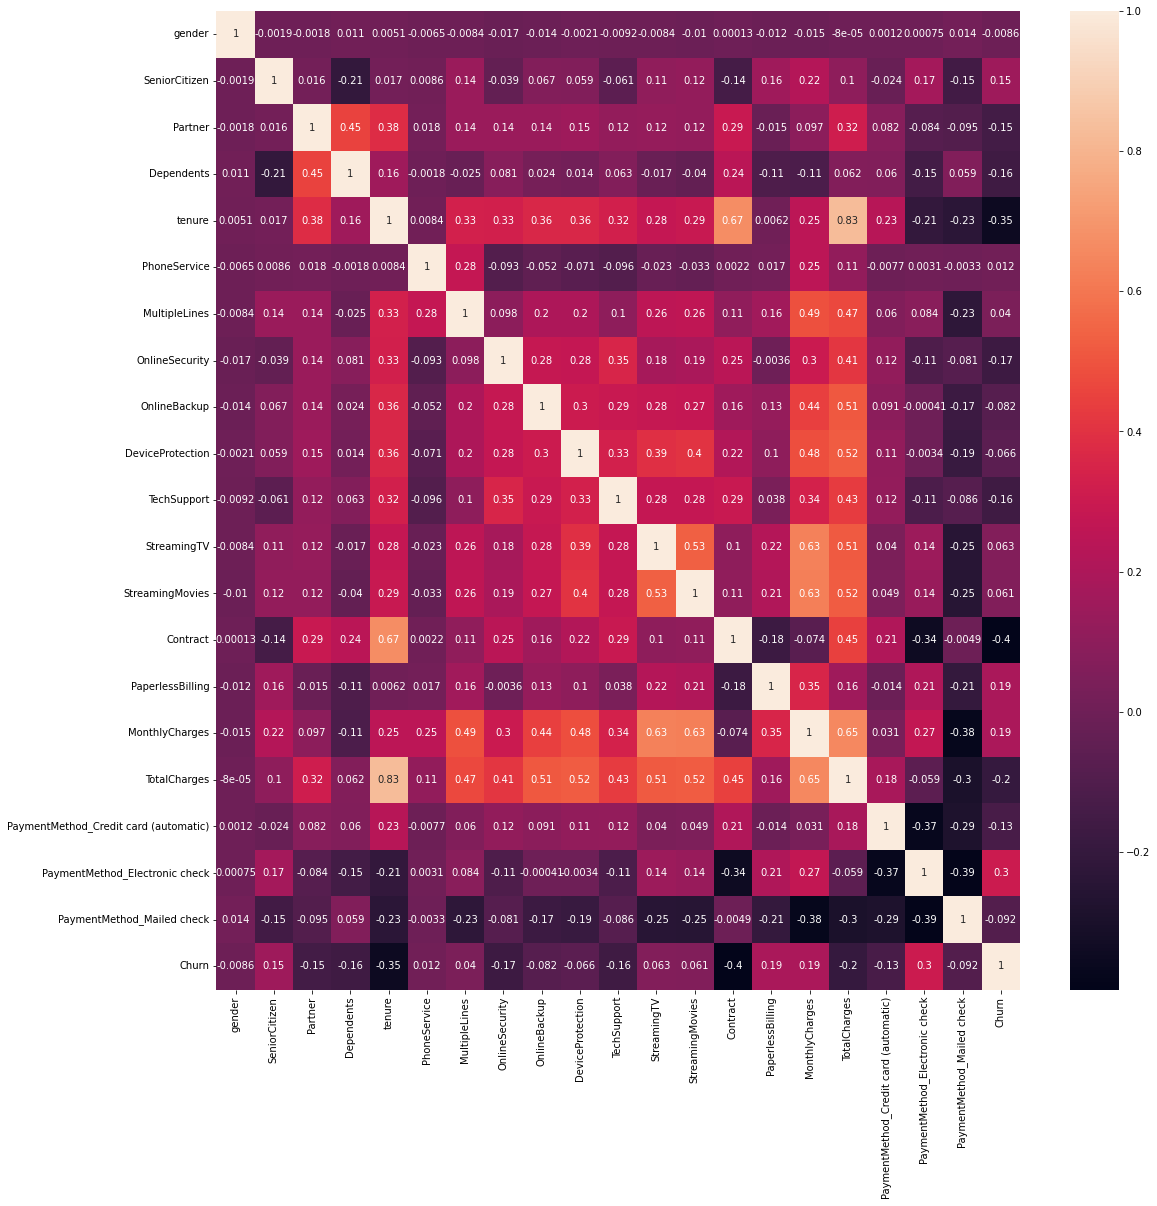

In [ ]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True)

In [ ]:
featurewithhighcorr = ['SeniorCitizen','Partner','Dependents','tenure','OnlineSecurity','TechSupport','Contract','PaperlessBilling','MonthlyCharges','TotalCharges','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check',]

## Model Creation

In [ ]:
X = df.loc[:,featurewithhighcorr]
y = df.iloc[:,-1]

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
X,y = smote.fit_resample(X,y)

In [ ]:
X

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,0,1,0,1,0,0,0,1,29.850000,29.850000,0,1
1,0,0,0,34,1,0,1,0,56.950000,1889.500000,0,0
2,0,0,0,2,1,0,0,1,53.850000,108.150000,0,0
3,0,0,0,45,1,1,1,0,42.300000,1840.750000,0,0
4,0,0,0,2,0,0,0,1,70.700000,151.650000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,0,0,8,0,0,0,0,97.781057,778.902711,0,1
10344,0,0,0,8,0,0,0,1,86.660616,760.393583,0,0
10345,0,0,0,16,0,0,0,0,79.462725,1257.763027,0,1
10346,0,0,0,47,0,0,0,0,85.384637,4044.232328,0,0


In [ ]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Scaling the Dataset
sc = StandardScaler()
SCX_train = sc.fit_transform(X_train)
SCX_test = sc.fit_transform(X_test)
# Define the pipeline for preprocessing, training, and testing the models
pipeline_lr = Pipeline([
    ('lr', LogisticRegression(C=0.1))
])

pipeline_dt = Pipeline([
    ('dt', DecisionTreeClassifier())
])

pipeline_nb = Pipeline([
    ('nb', GaussianNB())
])

pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=500))
])

pipeline_cb = Pipeline([
    ('cb', CatBoostClassifier(verbose=0))
])

pipeline_svc = Pipeline([
    ('svc', SVC())
])

pipeline_xgb = Pipeline([
    ('xgb', XGBClassifier())
])

# Train and test the models
pipelines = [pipeline_lr, pipeline_nb ,pipeline_dt, pipeline_rf,pipeline_cb,pipeline_svc,pipeline_xgb]
model_names = ['Logistic Regression','Gaussian Naive Bayes', 'Decision Tree', 'Random Forest','CatBoost','Support Vector Classifier','XGBoost']

for pipeline, model_name in zip(pipelines, model_names):
    pipeline.fit(SCX_train, y_train)
    y_pred = pipeline.predict(SCX_test)
    print(model_name)
    print('Accuracy:', accuracy_score(y_test, y_pred)*100)
    print('Classification Metrics:', classification_report(y_test,y_pred))
    print('ROC AUC score:', roc_auc_score(y_test, y_pred, multi_class='ovr'))
    print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
    print('\n\n')

Logistic Regression
Accuracy: 80.45088566827697
Classification Metrics:               precision    recall  f1-score   support

           0       0.84      0.75      0.79      1560
           1       0.77      0.86      0.81      1545

    accuracy                           0.80      3105
   macro avg       0.81      0.80      0.80      3105
weighted avg       0.81      0.80      0.80      3105

ROC AUC score: 0.8047765745581279
Confusion Matrix
 [[1169  391]
 [ 216 1329]]



Gaussian Naive Bayes
Accuracy: 77.487922705314
Classification Metrics:               precision    recall  f1-score   support

           0       0.80      0.73      0.77      1560
           1       0.75      0.82      0.78      1545

    accuracy                           0.77      3105
   macro avg       0.78      0.78      0.77      3105
weighted avg       0.78      0.77      0.77      3105

ROC AUC score: 0.7750746825989545
Confusion Matrix
 [[1146  414]
 [ 285 1260]]



Decision Tree
Accuracy: 77.004830917874

In [ ]:
# df.to_csv('cleanedtelchurn.csv',index=False)

# Deep Learning  ANN (Artifitial Neural Networks)

In [ ]:
y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Compiling Ann

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann.fit(SCX_train,y_train,batch_size=32,epochs = 100)


Epoch 1/100
227/227 [==============================] - 2s 3ms/step - loss: 0.4853 - accuracy: 0.7660
Epoch 2/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.7991
Epoch 3/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.8019
Epoch 4/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4275 - accuracy: 0.8022
Epoch 5/100
227/227 [==============================] - 1s 4ms/step - loss: 0.4235 - accuracy: 0.8085
Epoch 6/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4210 - accuracy: 0.8093
Epoch 7/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8110
Epoch 8/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.8095
Epoch 9/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4164 - accuracy: 0.8118
Epoch 10/100
227/227 [==============================] - 1s 3ms/step - loss: 0.4146 - accura

In [ ]:
ypred = ann.predict(SCX_test) > 0.5

98/98 [==============================] - 0s 1ms/step


In [ ]:
ypred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
print('Accuracy:', accuracy_score(y_test, ypred)*100)
print('Classification Metrics:', classification_report(y_test,ypred))
print('ROC AUC score:', roc_auc_score(y_test, ypred, multi_class='ovr'))
print('Confusion Matrix\n',confusion_matrix(y_test,ypred))

Accuracy: 77.84219001610306
Classification Metrics:               precision    recall  f1-score   support

           0       0.82      0.72      0.76      1560
           1       0.75      0.84      0.79      1545

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105

ROC AUC score: 0.77871857107294
Confusion Matrix
 [[1119  441]
 [ 247 1298]]
